### 1.0 LINEAR REGRESSION
LinearRegression fits a linear model with coefficients w = (w_1, ..., w_p) to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler #For feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
% matplotlib inline 

# List to denote custom field names
fields = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

# read csv and apply custom names to it 
# 'delim_whitespace' separates the field by a whitespace when set to True
data = pd.read_csv('housing.csv',delim_whitespace=True, names = fields)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Preprocess data

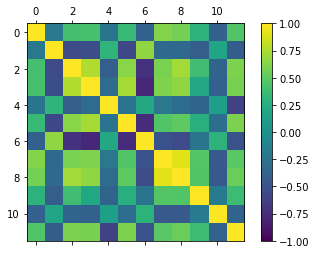

In [3]:
X = data.drop(['MEDV','CHAS'], 1)
y = data['MEDV']

# Visualize the corellation of the data
correlations = X.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

### Lets see how the average number or rooms affects the price of the House 
from the below plot, we can easily tell the more the rooms increase, the Value of the house increases as well.

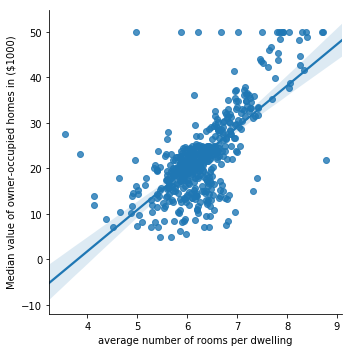

In [4]:
sns.lmplot(x = 'RM', y = 'MEDV', palette = 'Set1',data = data)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in ($1000)')
plt.show()

### Lets see how the crime rate by town affects the price of the House 
from the below plot, we can see that with the crime rate at the rate of 0 - 15, the values of the Houses were experiencing an increase but as the crime rate increased, the values dropped. From this information, we can conclude that The Higher the crime rate, the lower the house is valued at and Visa-versa

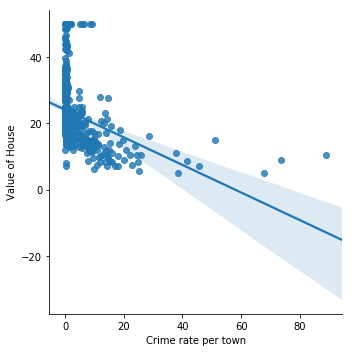

In [5]:
sns.lmplot(x = 'CRIM', y = 'MEDV', palette = 'Set1',data = data)
plt.xlabel('Crime rate per town')
plt.ylabel('Value of House')
plt.show()

### Here, we visualize how that Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (CHAS) affects the value of the House
We can see that it doesn't necessarily make sense, thus we drop the entire column:
    ### Note:
    After droping the CHAS column, the accuracy score of our model increased from 79% to a cool 80.39% Accuracy 
    Score.

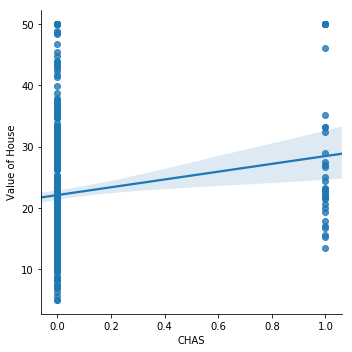

In [6]:
sns.lmplot(x = 'CHAS', y = 'MEDV', palette = 'Set1',data = data)
plt.xlabel('CHAS')
plt.ylabel('Value of House')
plt.show()

### Lets see how the Age of the house affects the price of the House 
from the below plot, we can see that with the increase in the Age of the house, the Value Decreases

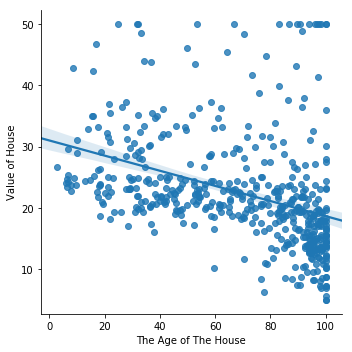

In [7]:
sns.lmplot(x = 'AGE', y = 'MEDV', palette = 'Set1',data = data)
plt.xlabel('The Age of The House')
plt.ylabel('Value of House')
plt.show()

### Cross Validation using train_test_split
Lets train a model to predict Housing prices based on our training set

In [15]:
scaler = MinMaxScaler()
scaledX = scaler.fit_transform(X)

from sklearn.preprocessing import Normalizer
norm = Normalizer().fit_transform(scaledX)

X_train, X_test, y_train, y_test = train_test_split(norm, y,test_size = 0.2, random_state = 3)

LR = LinearRegression()
LR.fit(X_train, y_train)

print('Accuracy Score: ',LR.score(X_test, y_test) * 100.00)

pred = LR.predict(X_test[1:5])
print('Prediction: ', pred)
print('\n')
for i in y_test[1:5]:
    print('Original Price: ',i)
print('')
print('Coeffitients: \n', LR.coef_)


Accuracy Score:  81.5973952114
Prediction:  [ 18.31843477  20.01267961  33.30573286  24.59618428]


Original Price:  17.1
Original Price:  17.8
Original Price:  33.1
Original Price:  21.9

Coeffitients: 
 [-45.76121663 -11.05971499 -14.07402781 -30.23093146  12.51799572
 -15.84126509 -37.77162011   4.1508933  -23.89601242 -30.97504728
  -8.17052214 -46.62569114]


## 2.0 RIDGE REGRESSION
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares

In [40]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha = .1, fit_intercept = True)
ridge.fit(X_train,y_train)
print('Score(%):',ridge.score(X_test, y_test)*100)


Score(%): 81.3677771741


In [38]:
pred = ridge.predict(X_test[1:5])
print('Prediction: ', pred)
print('\n')
for i in y_test[1:5]:
    print('Original Price: ',i)
print('')
ridge.coef_

Prediction:  [ 18.68920738  20.67811097  33.52750706  24.52806433]


Original Price:  17.1
Original Price:  17.8
Original Price:  33.1
Original Price:  21.9



array([-33.58886223,  -5.97394845, -10.04530115, -22.07795495,
        20.70726122, -11.15201725, -31.06117516,   5.16237579,
       -19.38732101, -25.08960117,  -3.1331736 , -41.7292788 ])